# Agniva Roy 
Sparks Foundation Task
Unsupervised Machine Learning-Clustering

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Reading the dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Since the Id column provides no valuable information we are dropping it 
df=df.drop("Id",axis=1)
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#Displaying the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


All the numerical variables either have a high positive correlation, or they have a negative correlation between them. Sepal length has high correlation with petal length and petal width and a negative correlation with sepal width.Sepal width has a negative correlation with the 3 other factors.Petal length and petal width has a high positive correlation

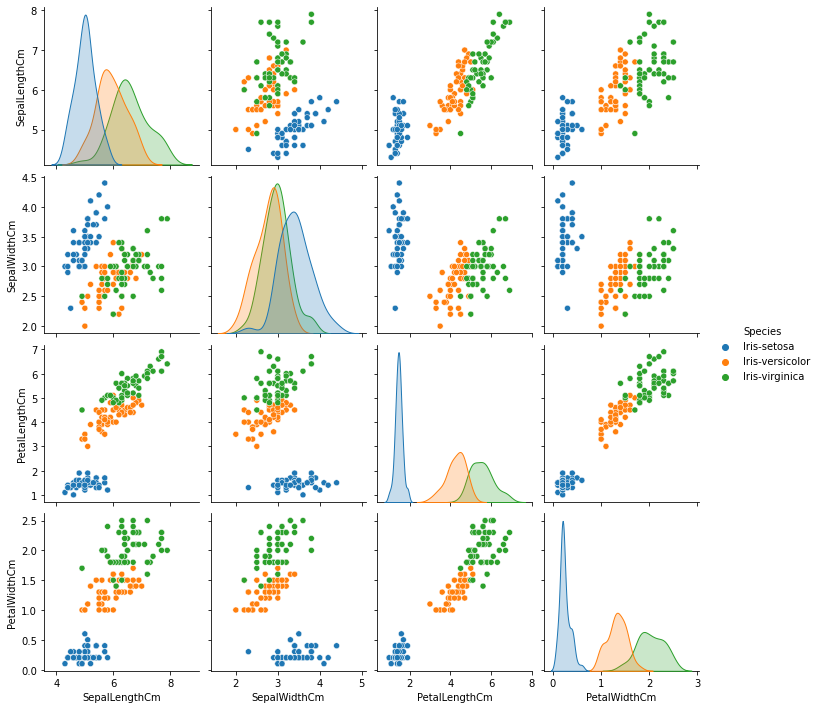

In [5]:
#Showing the pairplot between different numerical variables
sns.pairplot(df,hue="Species")

# Performing Tukey Test

In [6]:
#Calling necessary packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd,MultiComparison

In [7]:
#Comparing Petal Length
mc=MultiComparison(df["PetalLengthCm"],df["Species"])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,2.796,0.001,2.5922,2.9998,True
Iris-setosa,Iris-virginica,4.088,0.001,3.8842,4.2918,True
Iris-versicolor,Iris-virginica,1.292,0.001,1.0882,1.4958,True


In [8]:
#Comparing Petal Width
mc=MultiComparison(df["PetalWidthCm"],df["Species"])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,1.082,0.001,0.9849,1.1791,True
Iris-setosa,Iris-virginica,1.782,0.001,1.6849,1.8791,True
Iris-versicolor,Iris-virginica,0.7,0.001,0.6029,0.7971,True


In [9]:
#Comparing Sepal Length
mc=MultiComparison(df["SepalLengthCm"],df["Species"])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,0.93,0.001,0.6862,1.1738,True
Iris-setosa,Iris-virginica,1.582,0.001,1.3382,1.8258,True
Iris-versicolor,Iris-virginica,0.652,0.001,0.4082,0.8958,True


In [10]:
#Comparing Sepal Width
mc=MultiComparison(df["SepalWidthCm"],df["Species"])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


 The Tukey test shows that based on our data,there is significant difference in the 4 numerical variables between the 3 species

# KMeans Clustering

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
X=df.iloc[:,:-1].values

In [13]:
X=StandardScaler().fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

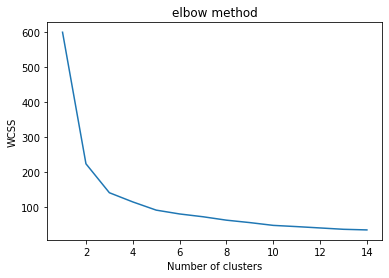

In [14]:
#Finding the optimal number of clusters using the elbow method. The metric used is within cluster sum of squares.
#WCSS is the sum of squared distance between each point and the centroid in a cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title("elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


We select the number of clusters as 3, as in this graph, the decrease in wcss after the 3rd iteration isn't that significant

In [15]:
#kmeans++ is used to escape the random initialization trap in KMeans
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_means=kmeans.fit_predict(X)
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [16]:
df["predicted"]=pd.DataFrame(y_means)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


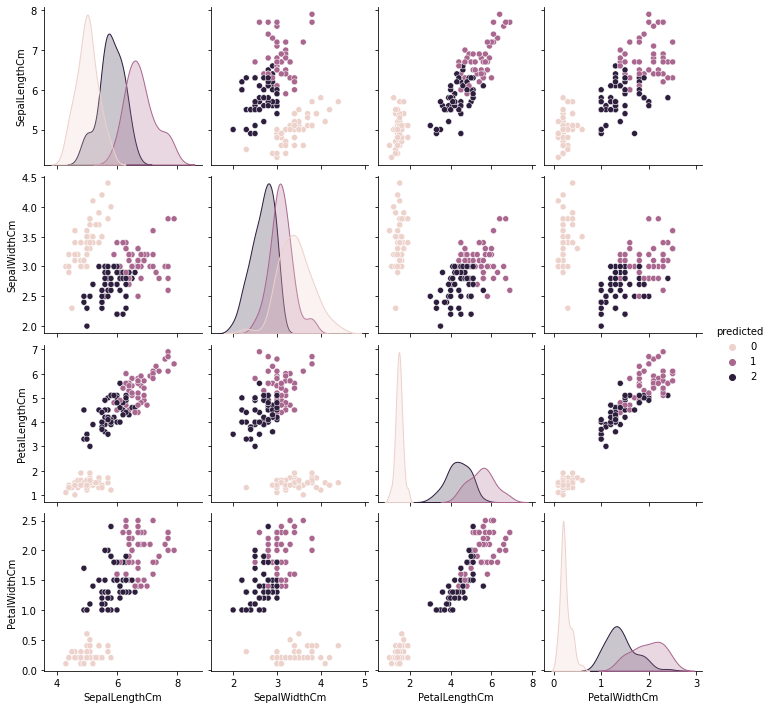

In [17]:
#Plotting the pairplots with the predicted clusters
sns.pairplot(df,hue="predicted")

We can see that the way our algorithm creates the clusters approximately matches with the original clusters